In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

spark_version = 'spark-3.4.2'
os.environ['SPARK_VERSION'] = spark_version

# Read data into Spark DataFrame and convert to Pandas DataFrame
df_spark = spark.read.format("csv").option("header", "true").load("cleaned_data.csv")
df = df_spark.toPandas()

In [4]:
# Display Basic Information
print("DataFrame Head:")
print(df.head().to_string(index=False))

print("\n\nMissing Values:")
print(df.isnull().sum().to_frame(name='Count'))

print("\n\nDescriptive Statistics:")
print(df.describe().to_string())

DataFrame Head:
_c0 bookID                                                        title                    authors average_rating   num_pages ratings_count text_reviews_count publication_date
  0      1    Harry Potter and the Half-Blood Prince (Harry Potter  #6) J.K. Rowling/Mary GrandPré           4.57         652       2095690              27591        9/16/2006
  1      2 Harry Potter and the Order of the Phoenix (Harry Potter  #5) J.K. Rowling/Mary GrandPré           4.49         870       2153167              29221         9/1/2004
  2      4   Harry Potter and the Chamber of Secrets (Harry Potter  #2)               J.K. Rowling           4.42         352          6333                244        11/1/2003
  3      5  Harry Potter and the Prisoner of Azkaban (Harry Potter  #3) J.K. Rowling/Mary GrandPré           4.56         435       2339585              36325         5/1/2004
  4      8       Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5) J.K. Rowling/Mary GrandPré      

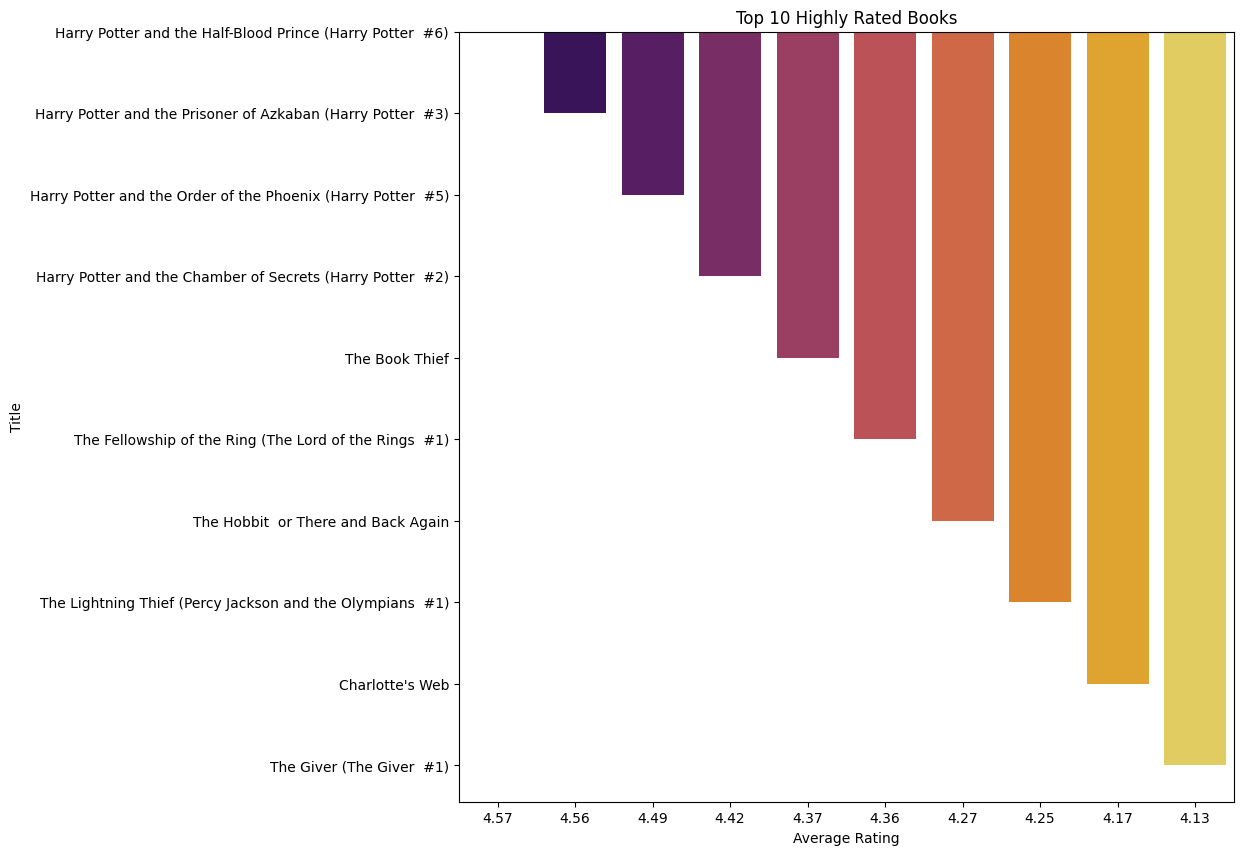

In [5]:
# Data Visualization - Top 10 Highly Rated Books
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
top_ten = df[df['ratings_count'] > 1000000].sort_values(by='average_rating', ascending=False).head(10)

plt.figure(figsize=(10, 10))
sns.barplot(x="average_rating", y="title", data=top_ten, palette='inferno', hue='average_rating', dodge=False)
plt.title('Top 10 Highly Rated Books')
plt.xlabel('Average Rating')
plt.ylabel('Title')
plt.show()

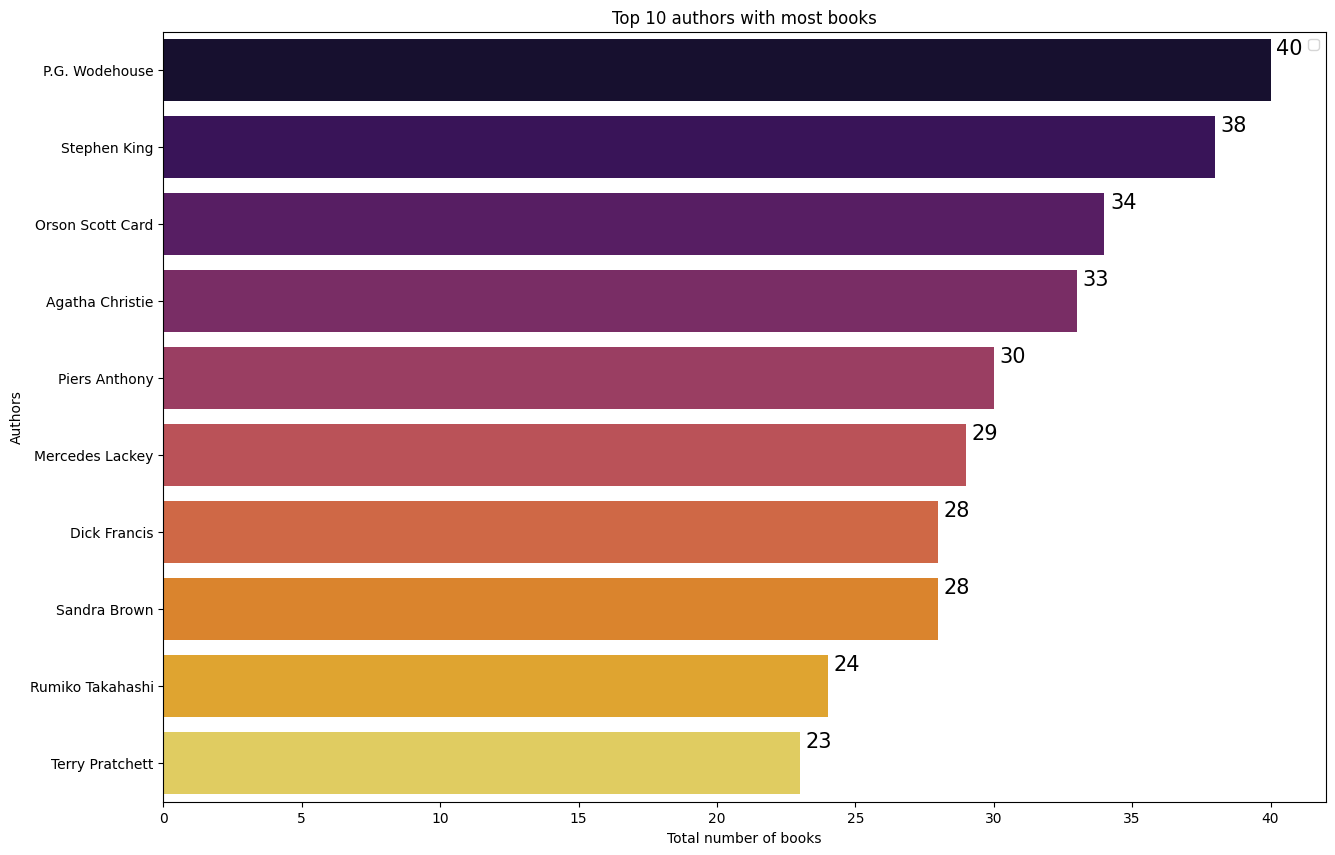

In [6]:
# Data Visualization - Top 10 Authors with Most Books
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_books['title'], y=most_books.index, hue=most_books.index, palette='inferno', dodge=False)
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
ax.set_ylabel("Authors")
ax.legend([])
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())), fontsize=15, color='black')
plt.show()

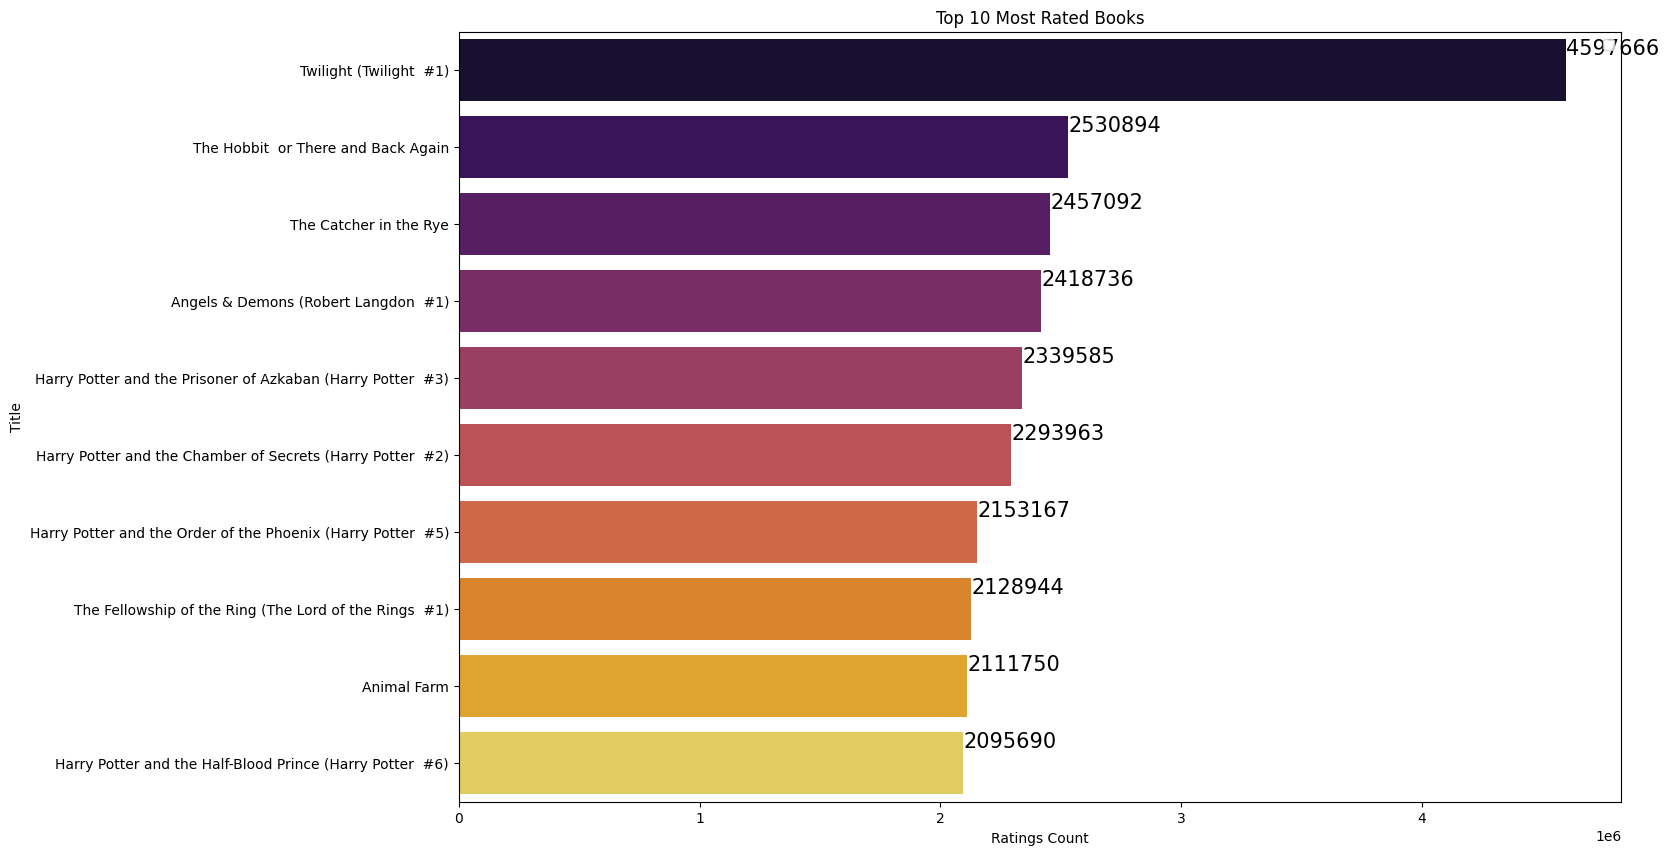

In [7]:
# Data Visualization - Top 10 Most Rated Books
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, hue=most_rated.index, palette='inferno', dodge=False)
ax.set_title("Top 10 Most Rated Books")
ax.set_xlabel("Ratings Count")
ax.set_ylabel("Title")
ax.legend([])
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + 0.2, str(round(i.get_width())), fontsize=15, color='black')
plt.show()

<Figure size 1500x1000 with 0 Axes>

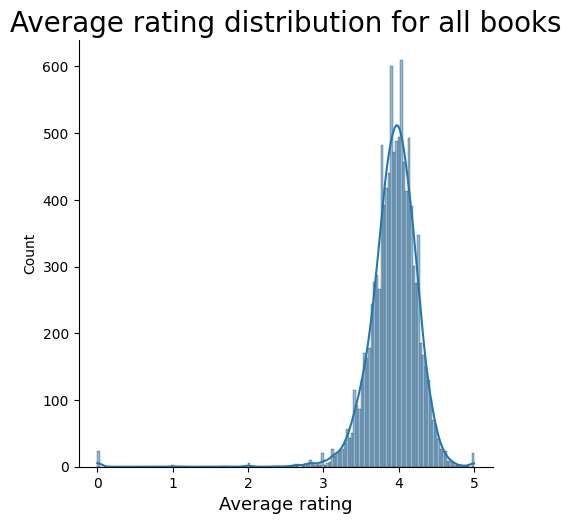

In [8]:
# Data Visualization - Average Rating Distribution
df['average_rating'] = df['average_rating'].astype(float)
fig = plt.figure(figsize=[15, 10])
sns.displot(df['average_rating'], kde=True)
plt.title('Average rating distribution for all books', fontsize=20)
plt.xlabel('Average rating', fontsize=13)
plt.show()

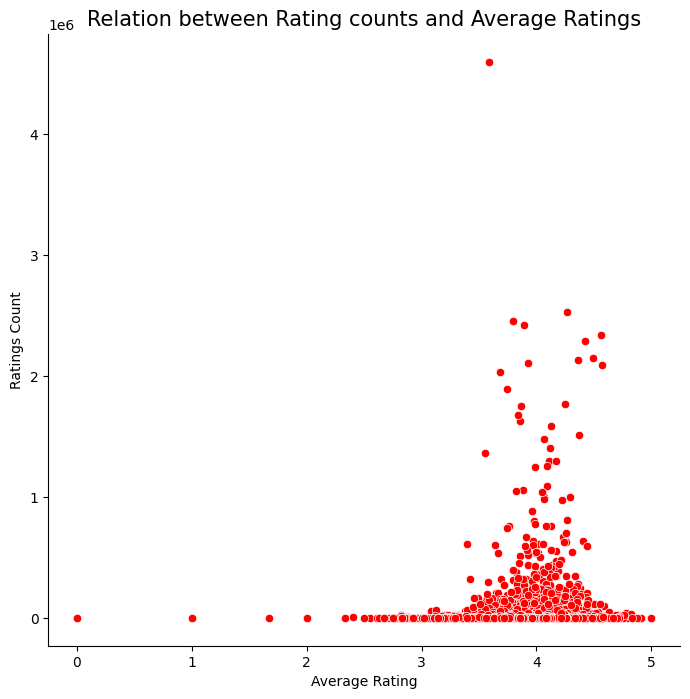

In [9]:
# Data Visualization - Relationship between Rating Counts and Average Ratings
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color='red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings", fontsize=15)
ax.set_axis_labels("Average Rating", "Ratings Count")